# Central Tendency

## Remarks
- This measures the "center" of the dataset (i.e. typical value), which provides a single value the represents the data's general behavior.
- The most common metrics are: **mean**, **median**, and **mode**. However, we could also list **trimmed mean** and **weighted mean**.
- Use **Mean** when the data is evenly distributed, that is, no extreme outliers. It is sensitive to outliers.
- Use **Median** when the data show signs of outiers, this is unaffected by them.
- **Mode** is useful for categorical data or when identifying the most common value in a dataset.

## Implementation

,Day,Sales
0,1,152
1,2,142
2,3,64
3,4,156
4,5,121


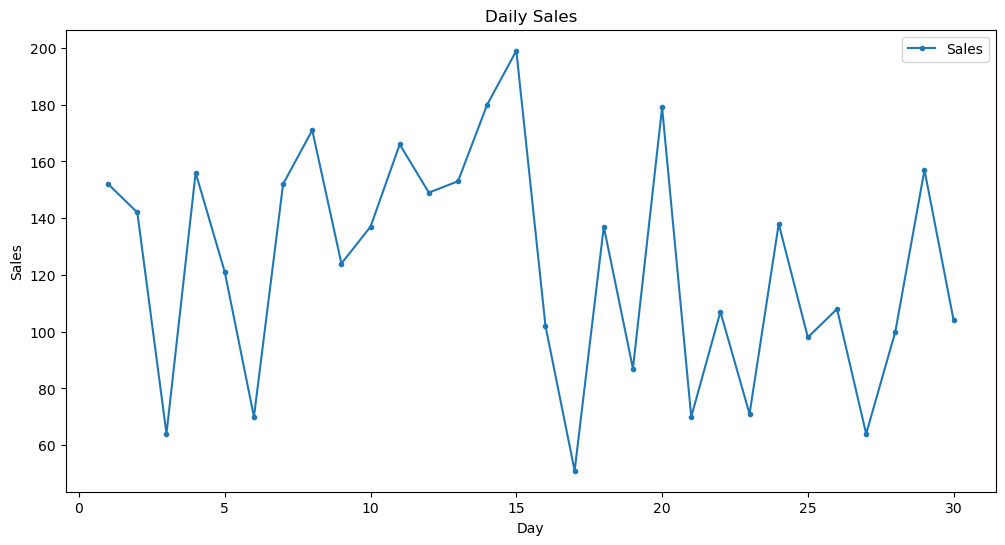

In [37]:
import numpy as np
import pandas as pd

#. Create dataset: daily sales
np.random.seed(42)
sales = np.random.randint(50, 200, size=30)
data = pd.DataFrame({"Day": range(1,31), "Sales": sales})

#. Display data
display( data.head() )

#. Plot sales
ax = data.plot(x="Day", y="Sales", marker='.', figsize=(12,6))
ax.set(title="Daily Sales", xlabel="Day", ylabel="Sales");

### Mean

This is also known as average. The sum of all values divided by the number of values.

In [52]:
#. Calculate mean and print it
mean_sales = data["Sales"].mean()
print(f"Mean sales: { round(mean_sales,2) }")

Mean sales: 123.63


### Median

This is the middle value of a dataset when arranged in ascending order.

**[Note]** If the total number of data points is even, the median is the average of the two middle values.

In [54]:
#. Calculate means and print it
median_sales = data["Sales"].median()
print(f"Median sales: { round(median_sales,2) }")

Median sales: 130.5


### Mode

It is the most frequent value in the dataset. It might exist more than one mode.

In [67]:
#. Calculate means and print it
mode_sales = data["Sales"].mode().iloc[0]
print(f"Mode sales: { round(mode_sales,2) }")

Mode sales: 64


## Plot Data...

... with central tendency values.

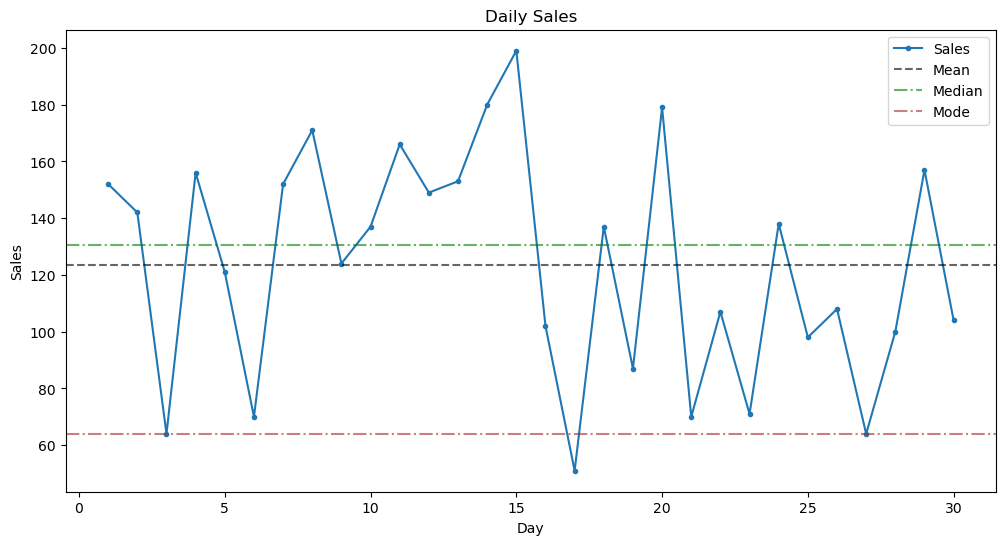

In [102]:
import matplotlib.pyplot as plt

ax = data.plot(x="Day", y="Sales", marker='.', figsize=(12,6))
ax.set(title="Daily Sales", xlabel="Day", ylabel="Sales")

ax.axhline(mean_sales, ls='--', c="black", alpha=0.6)
ax.axhline(median_sales, ls='-.', c="green", alpha=0.6)
ax.axhline(mode_sales, ls='-.', c="brown", alpha=0.6)
plt.legend(["Sales", "Mean", "Median", "Mode"]);

## Another examples

### Trimmed mean

Removes a specified percentage of the smallest and largest values in the dataset. This helps reduce the influecen of outliers on the result.

In [135]:
from scipy.stats import trim_mean

#. Cut the 20% of the top and bottom sales
timmed_mean_sales = trim_mean(sales, proportiontocut=0.2)
print(f"(Trimmed) Mean sales: { round(timmed_mean_sales,2) }")

(Trimmed) Mean sales: 125.94


### Weighted mean

Each value in the dataset contributes to the mean based on its assigned weight, that is, certain data points are more important than others or they carry more significance.

In [160]:
#. Create weights for sales based on weekends
#. Let's assume that the days 6, 7, 13, 14 ... are the busier 
weights = []
for day in data["Day"]:
    if (day % 7 == 6) or (day % 7 == 0):
        #. Weekend = Higher weight
        weights.append(2.0)
    else:
        #. Weekdays = Lower weight
        weights.append(1.0)

#. Add weights
data["Weight"] = weights

display( data.head() )

#. Calculate weighted mean
weighted_mean_sales = np.average(data["Sales"], weights=data["Weight"])
print(f"(Weighted) Mean sales: { round(weighted_mean_sales,2) }")

,Day,Sales,Weight
0,1,152,1.0
1,2,142,1.0
2,3,64,1.0
3,4,156,1.0
4,5,121,1.0


(Weighted) Mean sales: 123.08
